In [27]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sci
import matplotlib as zh

In [18]:
da=pd.read_csv(r'D:\kaishi\svr.csv',encoding='gb2312')
da.dropna(axis=0,inplace=True)

In [19]:
da.head()

,fuhe,1guolugonganmuguanyali,1guoluAxisifengjidianliu,1guoluAchexishifengliuliang,1guoluBxisifengjidianliu,1guoluBchexishifengliuliang,1guoluAchepenganliuliang,1guoluBchepenganliuliang,1guoluAcheSCRchukouyanwen,1guoluBcheSCRchukouyanwen,...,1guoluBchechukouNOXlongdu,1guoluAchepenganzongliang,1guoluBchepenganzongliang,1guoluyancongNOXlongdu,1guoluAcheantaoyi,1guoluBcheantaoyi,1guoluAchetuoNxiaolv,1guoluBchetuoNxiaolv,1guoluAcheSCRjinkouOliang,1guoluBcheSCRjinkouyangliang
0,407.68,0.33,-0.01,4277.04,66.96,4246.23,36.13,40.42,349.06,345.41,...,28.15,654187.66,701140.46,43.29,0.21,0.29,80.89,82.02,4.58,4.60
1,413.10,0.33,-0.01,4274.38,66.71,4246.99,34.32,36.61,347.45,344.06,...,32.11,654174.07,701125.01,45.40,0.29,0.37,79.00,79.08,4.45,4.35
2,409.85,0.32,-0.01,4280.15,67.16,4247.83,35.94,41.66,349.62,345.68,...,26.70,654182.89,701134.99,42.05,0.26,0.42,80.94,82.82,4.50,4.58
3,409.87,0.33,-0.01,4277.72,67.18,4244.65,37.71,44.91,351.23,347.57,...,25.65,654192.22,701145.91,42.47,0.17,0.32,82.03,83.94,4.70,4.85
4,397.93,0.33,-0.01,4275.77,66.78,4245.18,36.56,38.45,347.95,344.34,...,28.25,654201.46,701156.22,43.29,0.11,0.04,81.58,82.16,4.65,4.60


In [20]:
x1=da['fuhe']
x2=da['1guolugonganmuguanyali']
x3=da['1guoluAxisifengjidianliu']
x4=da['1guoluAchexishifengliuliang']
x5=da['1guoluBxisifengjidianliu']
x6=da['1guoluBchexishifengliuliang']
x7=da['1guoluAchepenganliuliang']
x8=da['1guoluBchepenganliuliang']
x9=da['1guoluAcheSCRchukouyanwen']
x10=da['1guoluBcheSCRchukouyanwen']
x11=da['1guoluAcherukouyanwen']
x12=da['1guoluBcheSCRrukouyanwen']
x13=da['1guoluAcheSCRjinkouyanqiyali']
x14=da['1guoluAcheSCRchukouyanqiyali']
x15=da['1guoluAcheSCRyacha']
x16=da['1guoluBcheSCRjinkouyali']
x17=da['1guoluBcheSCRchukouyali']
x18=da['1guoluBcheSCRyacha']
x19=da['1guoluAcherukouNOXlongdu']
x20=da['1guoluBcherukouNOXlongdu']
x21=da['1guoluAchechukouNOXlongdu']
x22=da['1guoluBchechukouNOXlongdu']
x23=da['1guoluAchepenganzongliang']
x24=da['1guoluBchepenganzongliang']
x25=da['1guoluyancongNOXlongdu']
x26=da['1guoluAcheantaoyi']
x27=da['1guoluBcheantaoyi']
x28=da['1guoluAchetuoNxiaolv']
x29=da['1guoluBchetuoNxiaolv']
x30=da['1guoluAcheSCRjinkouOliang']
x31=da['1guoluBcheSCRjinkouyangliang']

In [21]:
x1.df = {'负荷':x1,
         '供氨母管压力':x2,
         '锅炉A侧稀释风机电流':x3,
         '锅炉A侧稀释风流量':x4,
         '锅炉A侧喷氨流量':x7,
         '锅炉A侧SCR出口烟温':x9,
         '锅炉A侧SCR入口烟温':x11,
         '锅炉A侧SCR进口烟气压力':x13,
         '锅炉A侧SCR出口烟气压力':x14,
         '锅炉A侧SCR烟气压差':x15,
         '锅炉A侧入口NOx浓度':x19,
         '锅炉A侧出口NOx浓度':x21,
         '锅炉A侧喷氨总流量':x23,
         '锅炉烟囱NOx浓度':x25,
         '锅炉A侧氨逃逸':x26,
         #'锅炉A侧脱氮效率':x28,
         '锅炉A侧SCR进口氧量':x30
         }

In [22]:
df = pd.DataFrame(x1.df)

In [23]:
feature_name=['负荷',
              '供氨母管压力',
              '锅炉A侧稀释风机电流',
              '锅炉A侧稀释风流量',
              '锅炉A侧喷氨流量',
              '锅炉A侧SCR出口烟温',
              '锅炉A侧SCR入口烟温',
              '锅炉A侧SCR进口烟气压力',
              '锅炉A侧SCR出口烟气压力',
              '锅炉A侧SCR烟气压差',
              '锅炉A侧入口NOx浓度',
              '锅炉A侧出口NOx浓度',
              '锅炉A侧喷氨总流量',
              '锅炉烟囱NOx浓度',
              '锅炉A侧氨逃逸',
              '锅炉A侧脱氮效率',
              '锅炉A侧SCR进口氧量'
              ]

In [24]:
y = x28
k=len(y)
for i in range(k):
    if y[i]<=81.5:
        y[i]=0
    else:
        y[i]=1

In [25]:
x = pd.DataFrame(df)


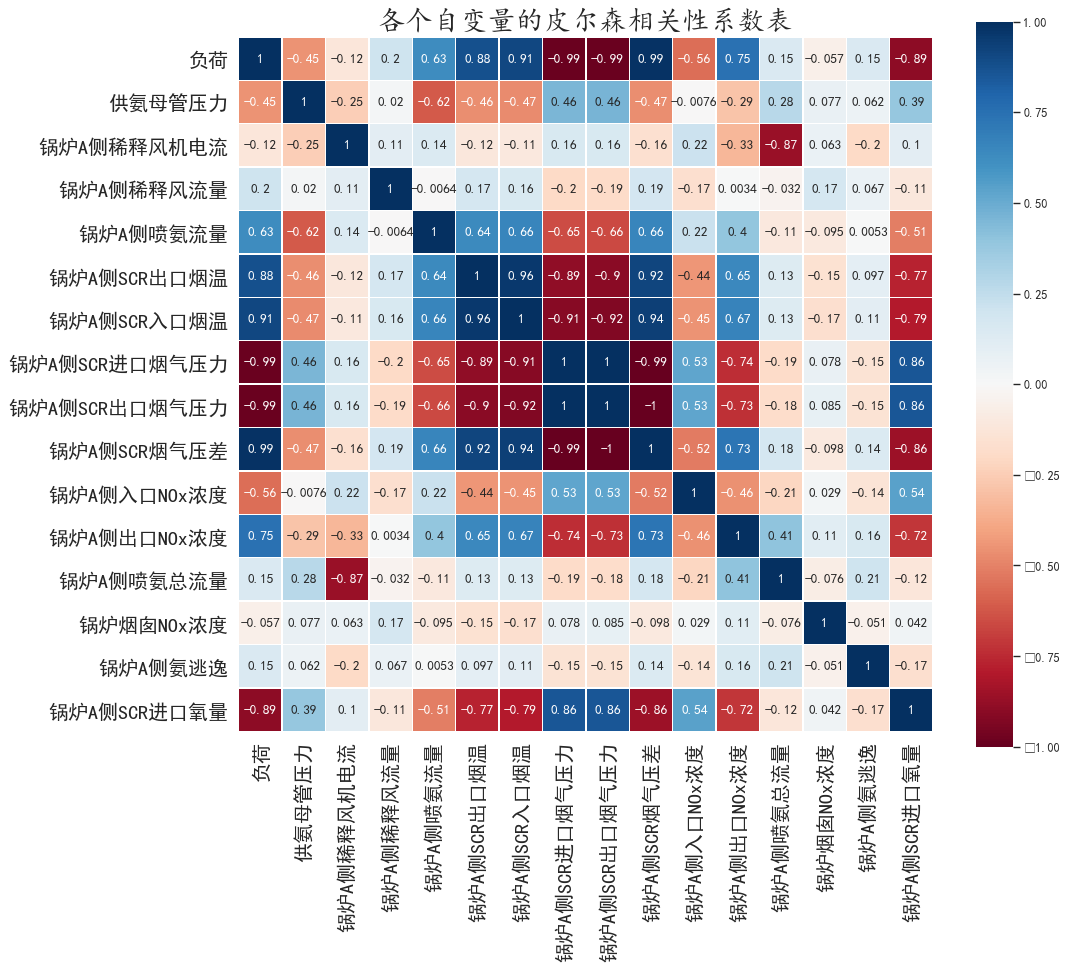

In [39]:
zhfont1 = zh.font_manager.FontProperties(fname='c:\Windows\Fonts\simkai.ttf')
sns.set(style='darkgrid')
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12),dpi=80)
plt.title('各个自变量的皮尔森相关性系数表',fontproperties=zhfont1,fontsize=25)
X = x.astype(float).corr()#x是所有自变量参数
sns.heatmap(X,linewidths=0.3,vmax=1,vmin=-1
            ,square=True,cmap=colormap
            ,linecolor='white'
            ,annot=True
            )
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})
plt.savefig("D:\kaishi\热力图.png",bbox_inches='tight',dpi=600,pad_inches=0.0)
plt.show()

In [37]:
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})
plt.savefig("D:\kaishi\热力图.png",bbox_inches='tight',dpi=600,pad_inches=0.0)
plt.show()

<Figure size 432x288 with 0 Axes>